# <b>1 <span style='color:#0386f7de'>|</span> Introduction</b>
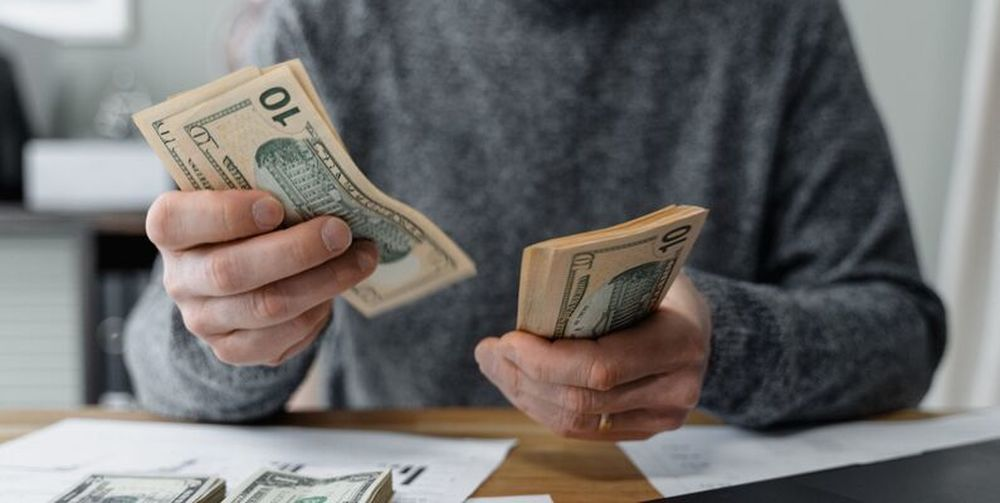
### Context
Salary Classification from various aspects (education, marital-status, occupation, race, and somemore..)
### Objective
Our goal here is to understand the data as much as possible , comparing different models of different companies, asking some
questions that will allow us to understand the data beter and predict if the salary whether less than 50K or greater than 50K ?
### Explanation of the variables of the dataset
1. age : continuous.
2. workclass:  a general term to represent the employment status of an individual
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt:  this is the number of people that census believes the entry represents
    - continuous.
4. education: Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad , Prof-school , Assoc-acdm , Assoc-voc , Some-college , Bachelors , Masters , Doctorate
5. education-num: a number that describe your education status from preschool to doctorate.
6. marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: represents what this individual is relative to other
    - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. salary: <=50K or >50K

# <b>2 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [2]:
import sys
sys.path.insert(1,'/kaggle/input/catreg')
from catReg import categoricalRegression

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier ,AdaBoostClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict , cross_val_score

# <b>3 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [3]:
df = pd.read_csv('../input/salary-prediction-classification/salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.describe().mean() - df.describe().median()

age                 4066.361937
fnlwgt            146672.668026
education-num       4067.666335
capital-gain       17089.043194
capital-loss        4632.256091
hours-per-week      4064.629383
dtype: float64

#### Insight :
   1. Always compare mean and median with your eyes as If the distribution is symmetric then the mean is equal to the median and the distribution will have zero skewness , it seems that we have skewness we will explore during EDA.

# <b>4 <span style ='color:#0386f7de'>|</span> Exploratory Data Analysis</b>
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

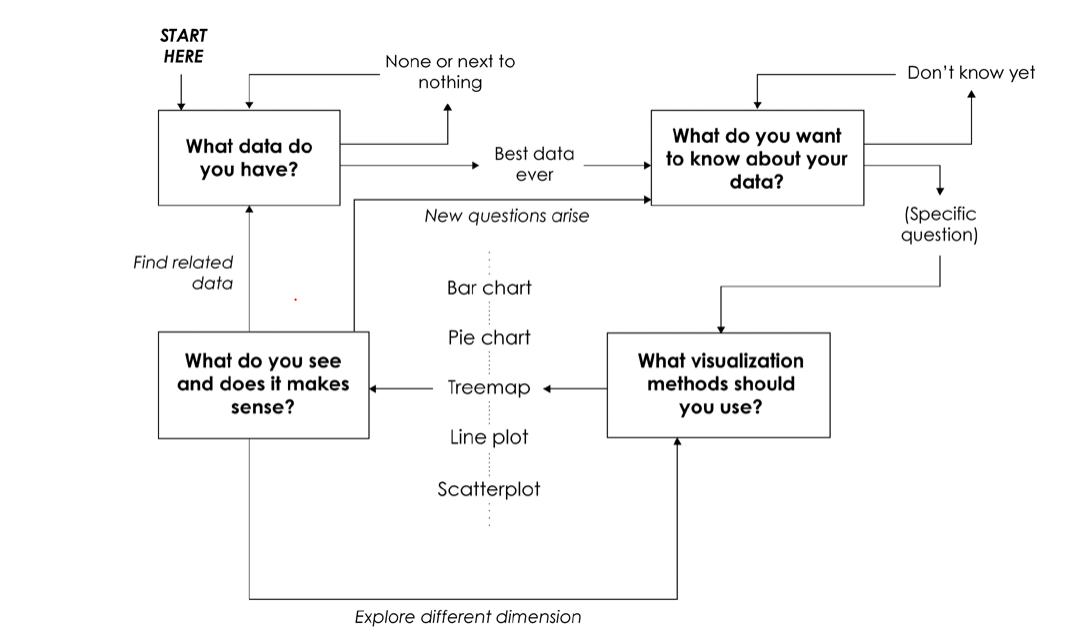
 

#### Q1 | Does the older get more money ?


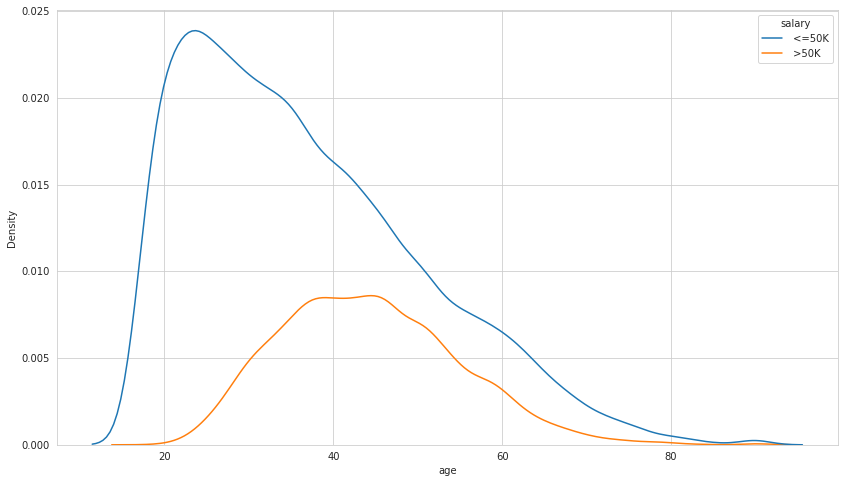

In [5]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()

#### Insight :
-  In the early twenties people making less money which is normal and as they get older start making more money and the curve of >50 increase and the curve of <=50 decrease till the peak at the forties, then starting gaining less money

### Related questions ?
1. what are the jobs of those who are more than 80 years old and working more than 50 hours?
2. what are the jobs of those who are less than 20 years old and making more than 50K ?

In [6]:
df_old = df[(df.age > 80)&(df['hours-per-week'] >=50)]
df_old

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5406,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
6232,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
7481,83,Private,195507,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K


#### Insight :
- Opss ,We can see that the data has missing values  
- It does not make sense for individuals to be over 80 years old and still able to work more than 50 hours per week (equivalent to 10 hours per day). However, as you can see, most of them are unmarried or have no family, so they may need to rely on themselves financially. Nevertheless, I would consider outliers so that the model is not distracted.

In [7]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [8]:
df.occupation.fillna(value='Other-service' , inplace=True)
df['native-country'].fillna(value='Other' , inplace=True)
df.workclass.fillna(value='Other' , inplace=True)

In [9]:
df.drop(df.loc[df_old.index].index,axis=0,inplace=True)

In [10]:
df_young = df[(df.age <=20)&(df['salary'] ==' >50K')]
df_young

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7741,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K
22910,19,Other,200790,12th,8,Married-civ-spouse,Other-service,Other-relative,White,Female,15024,0,40,United-States,>50K


- because we don't have enough info about that occupation that give to 19 years-old more than 50K per year epically one of them is Academically late , i will consider these two rows outliers

In [11]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)

#### Q2 | Does more education means more money ?

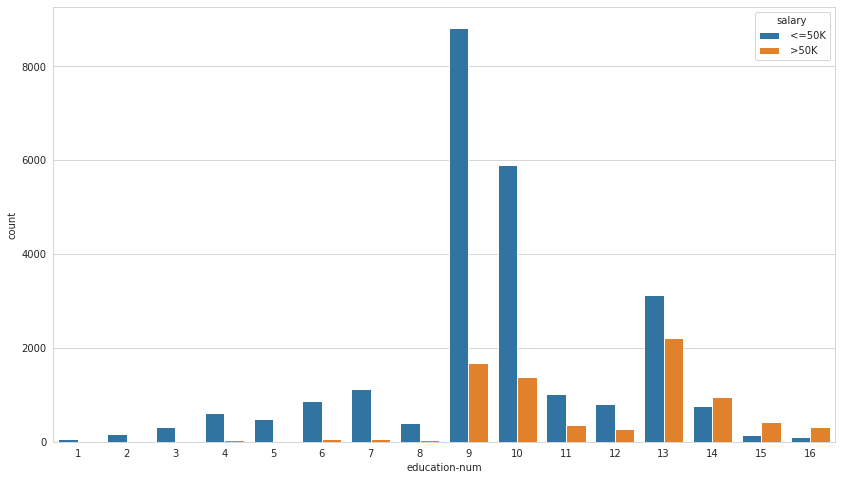

In [12]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'education-num', hue = 'salary')
plt.show()

#### Insight :
- that is true but you have to wait till reach educations-num 14(Bachelors) 

#### Q3 | Does being man means more money with respect to the education level?

In [13]:
df_genedr_education = df.groupby(['education-num' , 'sex'])['salary'].count().reset_index()

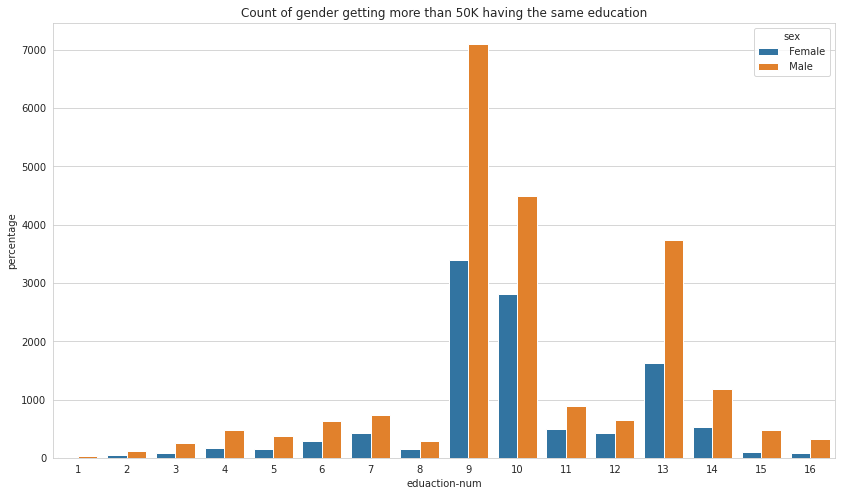

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'education-num' , y = 'salary' , hue = 'sex' , data = df_genedr_education)
plt.title('Count of gender getting more than 50K having the same education')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

#### Insight :
- Unfortunately, that is true because the number of males is greater than females across all levels of education. So, the question is whether sex is a statistically significant factor or not , we will know that later

#### Q4 | Which workclass that paying more money ?

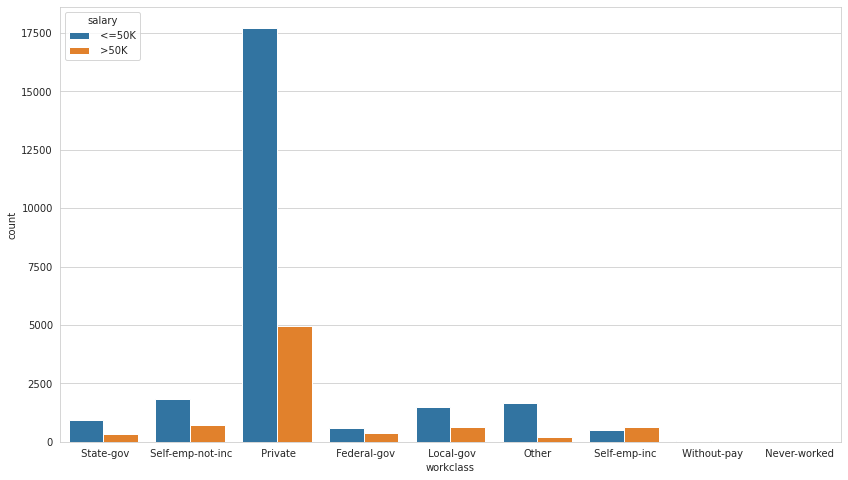

In [15]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'workclass', hue = 'salary')
plt.show()

#### Insight :
- private sector is dominates that market

#### Q5 | Which race dominates the USA market ?

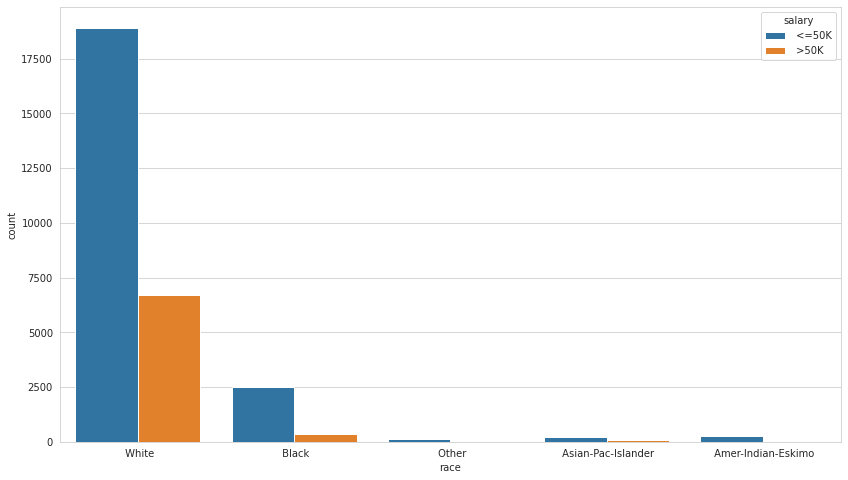

In [16]:
plt.figure(figsize=(14,8))
sns.countplot(data =df[df['native-country'] ==' United-States'] , x = 'race', hue = 'salary')
plt.show()

#### Insight :
- white race is dominates the jobs

# <b>5 <span style='color :#0386f7de'>| </span>  Data Preprocessing</b>

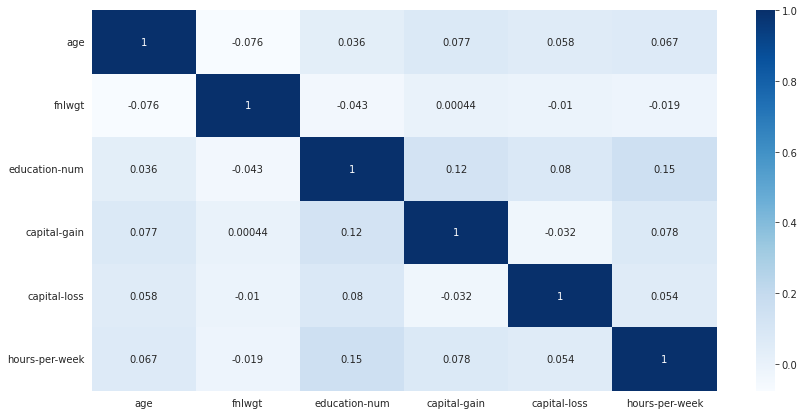

In [17]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr() , annot=True , cmap = 'Blues')
plt.show()

- Not bad!

In [18]:
df['native-country'].value_counts()

 United-States                 29155
 Mexico                          643
Other                            582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

as you can see we need to deal with  $native-country$ because that huge number will ruin our model (lead to a high-dimensional feature space, which may result in overfitting or make the model computationally expensive.) , we could just use target encode but first let's remove space

In [19]:
df['native-country'] =df['native-country'].apply(lambda x : x.strip())

In [20]:
def target_encoding(df, encode_col ,target_col,encoded_col_name):
    'This function is replacing the encode_col with a one of [low , mediun , high] bins'
    
    means = df.groupby(encode_col)[target_col].mean()  
    bins = [-0.2 , 0.12 , 0.26 , 0.4]
    cars_bin=['low','Medium','high']
    df[encoded_col_name] = pd.cut(df[encode_col].map(means)  ,bins,right=False,labels=cars_bin )
    df.drop(encode_col , axis = 1 , inplace = True)
    return df

In [21]:
df = target_encoding(df ,'native-country' , 'capital-gain' , 'native-country-encoded' )

- because the numerical variable <b> education-num </b> represnt the categorical <b> education </b> ,so i will remove the categorical one

In [22]:
df.drop('education' ,axis = 1 , inplace=True)

In [23]:
y = df['salary']
y = np.array([1 if row == ' >50K' else 0 for row in y ])
df.drop('salary' ,axis = 1 , inplace=True)

In [24]:
categorical_variable = df.select_dtypes(include=['object' , 'category']).columns
numerical_variable = df.select_dtypes(exclude=['object' , 'category']).columns

In [25]:
df_dummies=pd.get_dummies(df , columns=categorical_variable , drop_first=True)

In [26]:
def get_baseline(df ,categorical_columns ,  df_dummies):
    # Step 1: Create a dictionary of dummy columns for each original categorical column
    columns_dummies = {}
    for dummy_column in df_dummies.columns:
        column  = dummy_column.split('_')
        if len(column) > 1 :
            columns_dummies.setdefault(column[0], []).append(column[1])

    # Step 2: Find baseline values for each categorical column             
    column_baselines = {}
    for column in df[categorical_columns] :
        for value in df[column].unique():
            if value not in columns_dummies[column] :
                column_baselines[column] = value
                
                
    return column_baselines

In [27]:
column_baselines = get_baseline(df , categorical_variable , df_dummies)
column_baselines

{'workclass': ' Federal-gov',
 'marital-status': ' Divorced',
 'occupation': ' Adm-clerical',
 'relationship': ' Husband',
 'race': ' Amer-Indian-Eskimo',
 'sex': ' Female',
 'native-country-encoded': 'low'}

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies , y , test_size=0.2 ,shuffle=True, random_state=41)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (26035, 46)
Shape of testing feature: (6509, 46)
Shape of training label: (26035,)
Shape of training label: (6509,)


In [29]:
num_cols = [x for x in df.columns if df[x].dtype != 'object']
scaler = StandardScaler()
X_train[numerical_variable] = scaler.fit_transform( X_train[numerical_variable] )
X_test[numerical_variable] = scaler.transform( X_test[numerical_variable] )

# <b>6 <span style='color :#0386f7de'>| </span> Modeling </b>

####  Searching for the ones that fit the best

In [30]:
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state ,max_iter=1000))
classifiers.append(QDA())
classifiers.append(LDA())
classifiers.append(GaussianNB())
classifiers.append(KNeighborsClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(AdaBoostClassifier())

In [31]:
params = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',
    'eval_metric': ['logloss', 'auc', 'error']
}

# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train, y_train)
dtest_clf = xgb.DMatrix(X_test, y_test)

n = 1000

xgb_results = xgb.cv(
   params=params,
   dtrain=dtrain_clf,
   num_boost_round=n,
    verbose_eval= False ,
    early_stopping_rounds= 50 ,
    nfold=5,
)


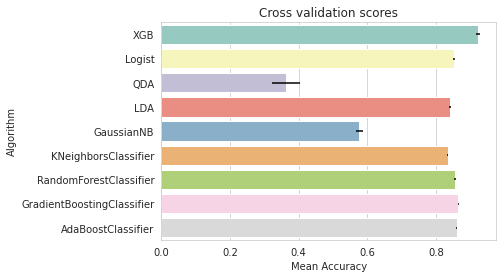

In [32]:
cv_results = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =4, n_jobs=4))
cv_means = [xgb_results['test-auc-mean'].mean() ]
cv_std = [xgb_results['test-auc-mean'].std() ]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":['XGB',"Logist","QDA","LDA",
"GaussianNB","KNeighborsClassifier" , "RandomForestClassifier" , "GradientBoostingClassifier" , "AdaBoostClassifier" ]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

it seems that the logist the XGB outperform the models

#### Feature Selection with XGBoost Feature Importance Scores


In [33]:
xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_clf,
   num_boost_round=n,
   evals=[(dtrain_clf, 'train'), (dtest_clf, 'test')],
   early_stopping_rounds=50,
   verbose_eval=10
)

[0]	train-logloss:0.54098	train-auc:0.89649	train-error:0.14273	test-logloss:0.54105	test-auc:0.89370	test-error:0.14288
[10]	train-logloss:0.29130	train-auc:0.92659	train-error:0.12986	test-logloss:0.29774	test-auc:0.92012	test-error:0.13043
[20]	train-logloss:0.26688	train-auc:0.93692	train-error:0.12214	test-logloss:0.28002	test-auc:0.92700	test-error:0.12291
[30]	train-logloss:0.25610	train-auc:0.94175	train-error:0.11842	test-logloss:0.27521	test-auc:0.92887	test-error:0.12137
[40]	train-logloss:0.24727	train-auc:0.94616	train-error:0.11488	test-logloss:0.27442	test-auc:0.92896	test-error:0.12229
[50]	train-logloss:0.23984	train-auc:0.94983	train-error:0.11047	test-logloss:0.27421	test-auc:0.92880	test-error:0.12414
[60]	train-logloss:0.23438	train-auc:0.95234	train-error:0.10732	test-logloss:0.27392	test-auc:0.92904	test-error:0.12352
[70]	train-logloss:0.22912	train-auc:0.95494	train-error:0.10348	test-logloss:0.27462	test-auc:0.92867	test-error:0.12306
[80]	train-logloss:0.2230

In [34]:
importance_scores = xgb_model.get_score(importance_type = 'weight')
sorted_importance = sorted(importance_scores.items() , key = lambda x : x[1] , reverse = True)
# Get the top 10 features
top_features = [feature[0] for feature in sorted_importance[:12]]
top_scores =  [feature[1] for feature in sorted_importance[:12]]

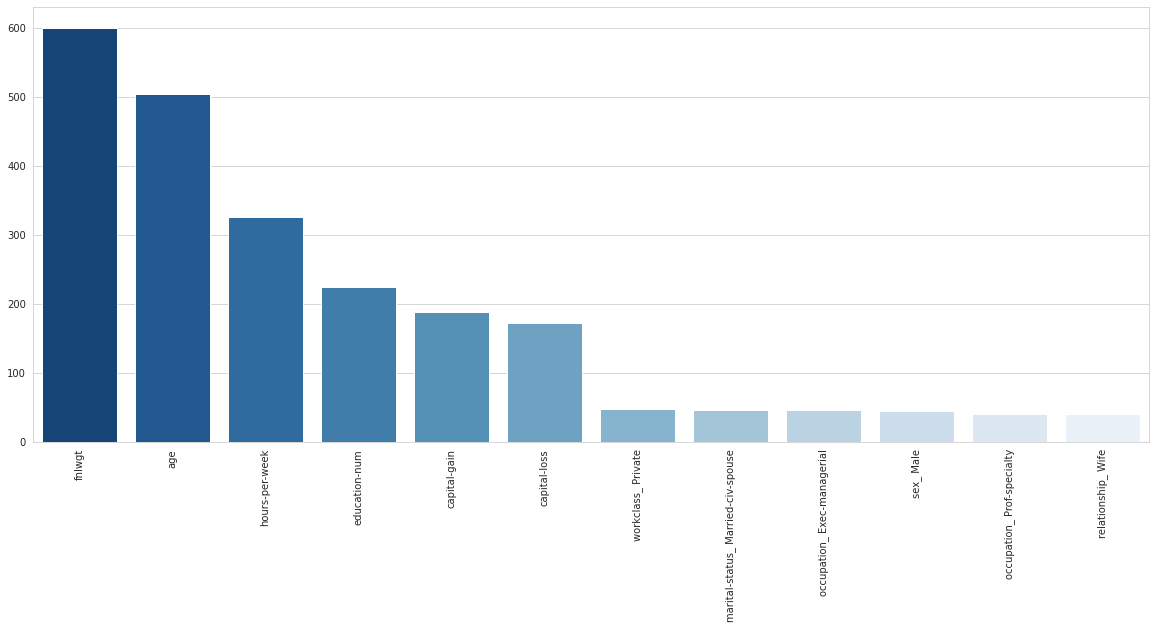

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(x = top_features , y = top_scores , palette='Blues_r')
plt.xticks(rotation = 90)
plt.show()

In [36]:
# Transform training and test datasets
X_train_transformed = X_train[top_features]
X_test_transformed =  X_test[top_features]

dtrain_transformed = xgb.DMatrix(X_train_transformed, label=y_train)
dtest_transformed = xgb.DMatrix(X_test_transformed, label=y_test)

In [37]:
xgb_model = xgb.train(
   params=params,
   dtrain=dtrain_transformed,
   num_boost_round=n,
   evals=[(dtrain_transformed, 'train'), (dtest_transformed, 'test')],
   early_stopping_rounds=50,
   verbose_eval=10
)

[0]	train-logloss:0.54106	train-auc:0.89625	train-error:0.14273	test-logloss:0.54114	test-auc:0.89346	test-error:0.14272
[10]	train-logloss:0.29336	train-auc:0.92480	train-error:0.13370	test-logloss:0.29973	test-auc:0.91856	test-error:0.13043
[20]	train-logloss:0.27261	train-auc:0.93279	train-error:0.12598	test-logloss:0.28412	test-auc:0.92374	test-error:0.12859
[30]	train-logloss:0.26314	train-auc:0.93700	train-error:0.12268	test-logloss:0.27899	test-auc:0.92611	test-error:0.12752
[40]	train-logloss:0.25674	train-auc:0.94034	train-error:0.11896	test-logloss:0.27849	test-auc:0.92615	test-error:0.13028
[50]	train-logloss:0.25173	train-auc:0.94284	train-error:0.11638	test-logloss:0.27789	test-auc:0.92630	test-error:0.12967
[60]	train-logloss:0.24775	train-auc:0.94479	train-error:0.11450	test-logloss:0.27770	test-auc:0.92636	test-error:0.12997
[70]	train-logloss:0.24387	train-auc:0.94676	train-error:0.11281	test-logloss:0.27755	test-auc:0.92635	test-error:0.12921
[74]	train-logloss:0.2421

Model explanation 

1 - now we took the top 12 feature based on the importance but what is that importance ?
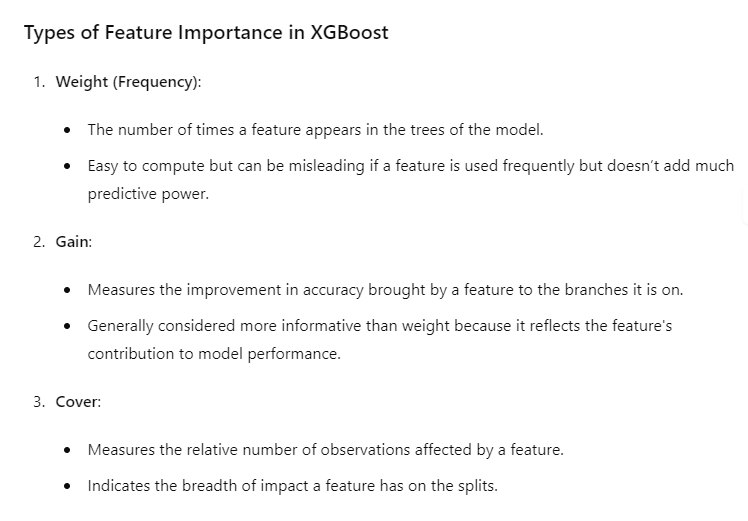

you can try the three ways and take the one that gives you the highest test-auc

2 - for the dummy variables we take 5 variables out of the 7, what does that mean?

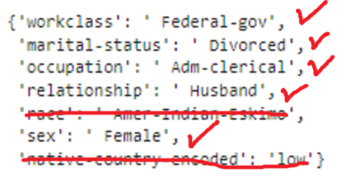

* Means that what ever the  **race**  of the employee that won't make a big difference same with **native-country-encoded** . 
* Taking the remaining features means that the sex of the employee makes a difference . 
* But if you asked me a question by how much percentage changes between males and females, I can't answer that question as we are dealing with a non-linear model ( in a linear regression model, β1 gives the average change in Y associated with a one-unit increase in X ) , so we give up Interpretability to get a high Prediction Accuracy.

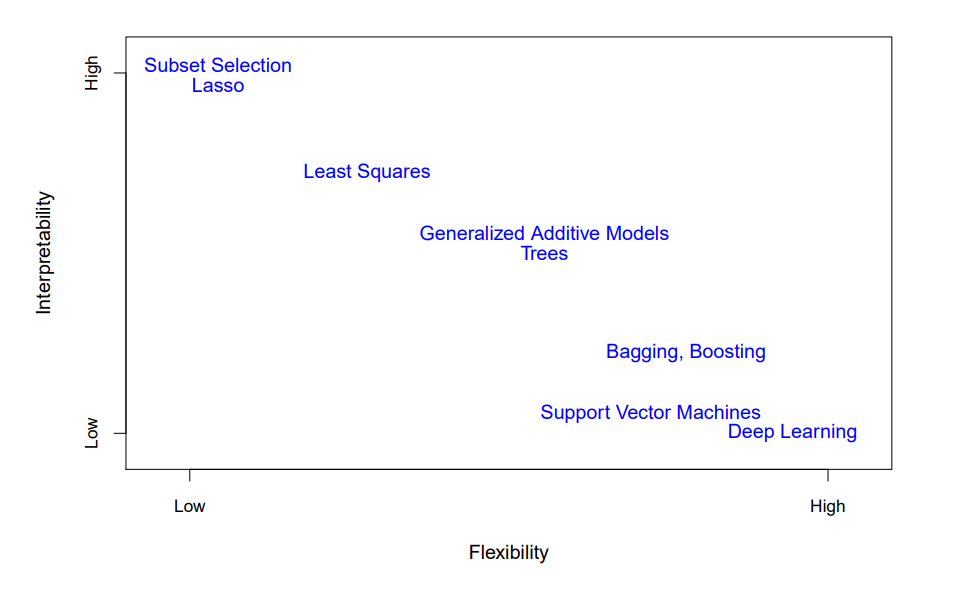